# Table 2: Predictive Ability with RMSE
Models to test:  
* Light GBM
* Stacking all models
* Stacking top 5 models 
* XGB
* Voting top 5
* Gradient Boosting
* Decision Tree
* Voting all
* Multilayer Perceptron (NN)
* Random Forest
* Linear Regression
* Ridge Regression
* Lasso Regression
* Elastic net
* SVM

    Note: we are using the conda env S1_2023
    Certain packages that are required can be found in requirements.txt

In [66]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, StackingRegressor

import pickle

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [67]:
x_train = pd.read_excel('data/final_train.xlsx')
y_train = pd.read_excel('data/y_train.xlsx')
x_test = pd.read_excel('data/final_test.xlsx')

x_train.drop(columns = 'ID', inplace= True)
x_test.drop(columns = 'ID', inplace= True)
y_train.drop(columns = 'ID', inplace= True)

print(x_train.shape, y_train.shape)
print(x_test.shape)

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

(7000, 171) (7000, 1)
(3000, 171)


## Full Train Set RMSE testing

In [54]:
def cv_splits(x, y, splits = 5):
    size = len(x)
    batch_size = int(size/splits)
    split_x = []
    split_y = []
    
    for i in range(batch_size,size + batch_size, batch_size):
        split_x.append(x[(i-batch_size):i])
        split_y.append(y[(i-batch_size):i])
    
    return split_x, split_y

In [61]:
x, y = cv_splits(x_train, y_train)

x_copy = x.copy()
y_copy = y.copy()
for i in x_copy:
    


,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_year,host_has_not_accepted_before,has_not_been_reviewed_before,host_has_not_replied_before,host_single_listing,license_exempt_flag,PID_license_flag,host_joined_after_covid_flag,first_rev_after_covid_flag,host_is_pro_managed,host_neigh_provided,walkscore,verf_cnt,has_facebook,has_jumio,has_email,has_review,has_phone,has_google,has_govt,unique_prop_type,budget_prop_type,highp_amen_cnt,pop_amen_cnt,lowp_amen_cnt,amenities_cnt,amen_prem_park,amen_ind_fireplace,amen_bathtub,amen_private_patio,amen_pool,amen_cable,amen_bbq,amen_hottub,amen_bbg_gear,amen_child_toys,amen_high_chair,amen_beach_ess,amen_st_park,amen_lug_dropoff,amen_bedlock,amen_lockbox,amen_elevator,amen_singlev,amen_kettle,amen_hostgreet,highp_amen_prop,sub_Sydney,sub_Waverley,sub_Randwick,sub_Pittwater,sub_Manly,sub_Warringah,sub_North_Sydney,sub_Woollahra,sub_Marrickville,sub_Leichhardt,sub_Sutherland_Shire,sub_Rockdale,sub_Hornsby,sub_Botany_Bay,sub_Ryde,sub_Mosman,sub_Parramatta,sub_Auburn,sub_Willoughby,sub_Canada_Bay,sub_The_Hills_Shire,sub_Ku-Ring-Gai,sub_Burwood,sub_Blacktown,sub_Penrith,sub_Lane_Cove,sub_Canterbury,sub_City_Of_Kogarah,sub_Ashfield,sub_Bankstown,sub_Liverpool,sub_Hurstville,sub_Fairfield,sub_Strathfield,sub_Campbelltown,sub_Camden,sub_Holroyd,sub_Hunters_Hill,sub_Surry_Hills,sub_Bondi_Beach,sub_Coogee,sub_Bondi,sub_Palm_Beach,sub_Alexandria,sub_Wolli_Creek,sub_Potts_Point,sub_Chatswood,sub_Newtown,sub_Northern_Beaches,sub_Haymarket,sub_Pyrmont,sub_Forest_Lodge,sub_Waterloo,sub_North_Bondi,sub_Millers_Point,sub_Rhodes,sub_North_Curl_Curl,sub_Kirribilli,sub_Narrabeen,sub_Newport,description_length,desc_beach,desc_amen,desc_view,desc_lux,desc_transport,desc_sentiment,neigh_sentiment,host_about_sentiment,host_response_time_a few days or more,host_response_time_no response time,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,dist,hway_dist
0,4854,1.00,0.69,1,2,1,1,-33.80084,151.26378,6,3.0,3,3,2,22,2,2,22,22,2.0,22.0,1,0,14,14,174,3,1,0,2620.0,643.0,4.67,4.33,4.33,4.67,4.33,4.67,4.33,0,2,2,0,0,0.04,2009,0,0,0,0,1,0,0,0,0,0,83,6,0,1,1,1,1,0,1,1,0,2,19,2,29,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0.07,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,949,1,1,0,1,1,0.8932,0.1027,0.9201,0,0,0,1,0,1,0,0,0,0.931,15.029
1,4841,1.00,1.00,0,3,1,1,-33.87964,151.21680,2,1.0,1,1,2,90,2,2,90,90,2.0,90.0,1,5,31,61,336,383,18,6,4029.0,458.0,4.42,4.58,4.40,4.77,4.67,4.70,4.47,1,1,0,1,0,3.21,2009,0,0,0,0,0,1,0,0,0,0,98,9,1,1,1,1,1,0,1,0,0,2,20,4,40,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0.05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,935,0,1,1,1,1,0.9821,0.9678,0.9972,0,0,0,0,1,0,0,1,0,1.622,8.070
2,4503,1.00,0.81,1,1,1,1,-33.81748,151.23484,4,1.0,1,1,2,90,2,2,90,90,2.0,90.0,1,1,9,33,217,297,15,4,4450.0,461.0,4.55,4.66,4.23,4.87,4.90,4.73,4.68,0,1,1,0,0,2.23,2010,0,0,0,1,0,1,0,0,0,0,77,7,1,1

In [75]:
cross_val_score(LinearRegression(), x_train.fillna(0), y_train, cv=7, scoring='neg_root_mean_squared_error')

array([-234.617361, -198.702909, -213.949190, -240.681809, -244.075181,
       -177.032067, -228.028060])

In [76]:
lr = LinearRegression()
las = Lasso()
rdg = Ridge()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
dtr = DecisionTreeRegressor(max_depth=10)
#nnr = MLPRegressor()
rfr = RandomForestRegressor()
from sklearn.metrics import mean_squared_error

estimators = [[lr, 'lin reg'], [las, 'lasso'], 
              [rdg, 'ridge'], [gbr, 'grad boost'], 
              [dtr, 'decision tree'], [nnr, 'percep'], 
              [rfr, 'random forest'], [xgb, 'XGBoost']]
              #, [lgbm, 'lgbm']]

for est in estimators:
    est[0].fit(x_train.fillna(0), y_train)
    rmse = mean_squared_error(est[0].predict(x_train.fillna(0)), y_train)**1/2
    print(f'{est[1]} RMSE = {rmse}')

lin reg RMSE = 22036.266922295785
lasso RMSE = 23016.642249172713
ridge RMSE = 22073.317329392765
grad boost RMSE = 9707.500941811591
decision tree RMSE = 4455.803611058128
percep RMSE = 874478516.691123
random forest RMSE = 2410.6438977428575
XGBoost RMSE = 704.1915330193206


In [97]:
lr = LinearRegression()
las = Lasso()
rdg = Ridge()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
dtr = DecisionTreeRegressor(max_depth=10)
rfr = RandomForestRegressor()
from sklearn.metrics import mean_squared_error

estimators = [[lr, 'Linear Regression'], [las, 'Lasso'], 
              [rdg, 'Ridge'], [gbr, 'GBM'], 
              [dtr, 'Decision Tree'], [rfr, 'Random Forest'], [xgb, 'XGBoost']]

In [109]:
print(f'Beggining 7 fold CV for our {len(estimators)} models')
est_names = [est[1] for est in estimators]
df_names = []
for i in est_names:
    df_names.extend([i]*7)
scores = []
for est in estimators:
    scores.extend(cross_val_score(estimator = est[0] , 
                    X = x_train.fillna(0), 
                    y = y_train, 
                    cv = 7, 
                    scoring='neg_root_mean_squared_error'))

Beggining 7 fold CV for our 7 models


In [114]:
perform_df = pd.DataFrame({
    'Model':df_names,
    'RMSE':scores
})

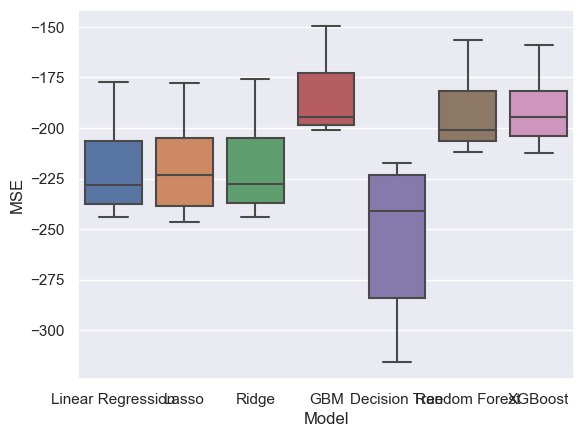

In [113]:
sns.boxplot(data = perform_df, x = 'Model', y = 'MSE')
plt.show()

In [77]:
for est in estimators:
    scores = cross_val_score(estimator = est[0] , 
                    X = x_train.fillna(0), 
                    y = y_train, 
                    cv = 7, 
                    scoring='neg_root_mean_squared_error')
    print(f'{est[1]} scores: {scores}, mean rmse = {scores.mean()}, std of rmse = {scores.std()}\n')

lin reg scores: [-234.617361 -198.702909 -213.949190 -240.681809 -244.075181 -177.032067
 -228.028060], mean rmse = -219.58379670991715, std of rmse = 22.74290363295636

lasso scores: [-238.446852 -197.248665 -212.728472 -238.607791 -246.741310 -177.692707
 -223.271706], mean rmse = -219.24821464034457, std of rmse = 23.203408090423782

ridge scores: [-234.046210 -198.429522 -211.908464 -239.920213 -244.237133 -175.668648
 -227.484045], mean rmse = -218.8134622349683, std of rmse = 23.064296996514507

grad boost scores: [-196.136531 -158.364727 -185.125331 -201.134453 -198.454065 -150.824140
 -196.564884], mean rmse = -183.8005901654265, std of rmse = 19.147823853887665

decision tree scores: [-301.626176 -277.077571 -236.608135 -260.672728 -221.842351 -216.036729
 -271.452337], mean rmse = -255.04514659787554, std of rmse = 29.081391365461332

percep scores: [-355.370281 -278.937541 -273106.695772 -467337.525131 -330.613338
 -216.551964 -1190817.625081], mean rmse = -276063.3313011256

In [30]:
xg_fi = pd.DataFrame({
    'name':xgb.feature_names_in_,
    'importance':xgb.feature_importances_
})
xg_fi.sort_values('importance')

,name,importance
133,sub_Palm_Beach,0.000000
104,sub_Botany_Bay,0.000000
102,sub_Rockdale,0.000000
140,sub_Haymarket,0.000000
150,sub_Newport,0.000000
...,...,...
70,amen_prem_park,0.029351
167,room_type_Private room,0.039943
74,amen_pool,0.051405
10,bathrooms,0.067985


In [14]:
est = DecisionTreeRegressor(max_depth=10)

est.fit(x_train.fillna(0), y_train)
preds = est.predict(x_train.fillna(0)).tolist()
preds = pd.Series([i for i in preds]) # add[0]

residuals = pd.DataFrame({
    'pred':preds,
    'true':y_train['price']
})

residuals['error'] = residuals['pred'] - residuals['true']
print(residuals.sort_values('error').head())
print((residuals['error']**2).mean()**1/2)

            pred  true        error
2773  180.740206  1300 -1119.259794
2807  280.809524  1357 -1076.190476
4679  227.965217  1050  -822.034783
4739  180.740206   999  -818.259794
3591  190.127660  1000  -809.872340
4455.803611058128


In [27]:
residuals['mape'] = round(residuals['error']/residuals['true'], 2)
residuals['mape'].mean()

0.13563571428571428

<AxesSubplot: xlabel='true', ylabel='error'>

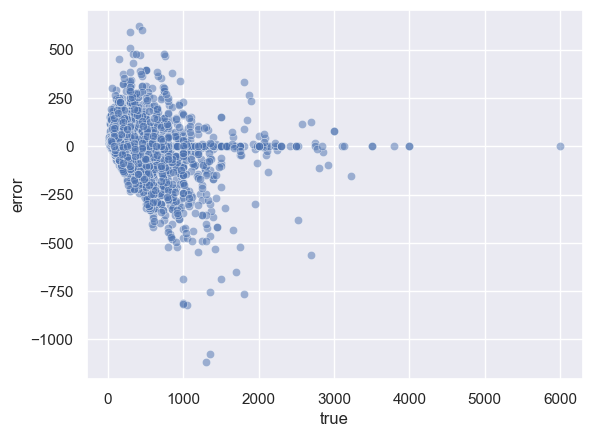

In [23]:
#sns.scatterplot(x = residuals.index, y = residuals['error'])
sns.scatterplot(x = residuals['true'], y = residuals['error'], alpha = 0.5)
# model is guessing less than true price most of the time

# Table 2: Predictive Ability with MAE

Repeat same as above but different evaluation metric

# Predictive Ability without Feature Engineering

Deleted the 'smart' features to check performance. Below we illustrate the effect when there is no feature engineering (except for some very basic operations) performed on the RMSE of the training set.  

Specifically, we take the approach to:  
* Leave all text columns untouched
* Reformat date, binary string and percentage columns to integers
* *Dummify* some columns e.g. host response time and suburbs
* Feature scaling

In [20]:
x_og_train = pd.read_csv('data/raw_train.csv')

# drop text or useless cols
cols_to_drop = ['ID','price', 'description','name', 'neighborhood_overview', 'host_name',
                'host_location','host_about','host_neighbourhood','host_verifications',
                'neighbourhood','property_type','amenities','license']
x_og_train.drop(columns = cols_to_drop, inplace=True)

# format percentages 
x_og_train['host_response_rate'] = x_og_train['host_response_rate'].str.rstrip('%').astype('float') / 100.0
x_og_train['host_acceptance_rate'] = x_og_train['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

# map binary columns appropriately
x_og_train['host_is_superhost'] = x_og_train['host_is_superhost'].map({'f':0, 't':1})
x_og_train['host_has_profile_pic'] = x_og_train['host_has_profile_pic'].map({'f':0, 't':1})
x_og_train['host_identity_verified'] = x_og_train['host_identity_verified'].map({'f':0, 't':1})
x_og_train['has_availability'] = x_og_train['has_availability'].map({'f':0, 't':1})
x_og_train['instant_bookable'] = x_og_train['instant_bookable'].map({'f':0, 't':1})

# map date columns appropriately 
x_og_train['host_since_year'] = pd.to_datetime(x_og_train['host_since']).dt.year
x_og_train['host_since'] = -(pd.to_datetime(x_og_train['host_since']) -  pd.to_datetime("now")).dt.days
x_og_train['first_review'] = -(pd.to_datetime(x_og_train['first_review']) -  pd.to_datetime("now")).dt.days
x_og_train['last_review'] = -(pd.to_datetime(x_og_train['last_review']) -  pd.to_datetime("now")).dt.days

# clean bathroom column and convert to float
x_og_train['bathrooms'] = x_og_train['bathrooms'].str.extract(r'(\d+(?:\.\d+)?)').astype('float')

# imputing missing cols with common sense substitution from other column
x_og_train['minimum_minimum_nights'] = x_og_train['minimum_minimum_nights'].fillna(x_og_train['minimum_nights'])
x_og_train['maximum_maximum_nights'] = x_og_train['maximum_maximum_nights'].fillna(x_og_train['maximum_nights'])
x_og_train['availability_365'] = x_og_train['availability_365'].fillna(x_og_train['availability_90']*4) # can also fiddle with just 1 instead of 4 (did analysis)

x_og_train = pd.get_dummies(x_og_train)
x_og_train.head()

,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_year,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Ashfield,neighbourhood_cleansed_Auburn,neighbourhood_cleansed_Bankstown,neighbourhood_cleansed_Blacktown,neighbourhood_cleansed_Botany Bay,neighbourhood_cleansed_Burwood,neighbourhood_cleansed_Camden,neighbourhood_cleansed_Campbelltown,neighbourhood_cleansed_Canada Bay,neighbourhood_cleansed_Canterbury,neighbourhood_cleansed_City Of Kogarah,neighbourhood_cleansed_Fairfield,neighbourhood_cleansed_Holroyd,neighbourhood_cleansed_Hornsby,neighbourhood_cleansed_Hunters Hill,neighbourhood_cleansed_Hurstville,neighbourhood_cleansed_Ku-Ring-Gai,neighbourhood_cleansed_Lane Cove,neighbourhood_cleansed_Leichhardt,neighbourhood_cleansed_Liverpool,neighbourhood_cleansed_Manly,neighbourhood_cleansed_Marrickville,neighbourhood_cleansed_Mosman,neighbourhood_cleansed_North Sydney,neighbourhood_cleansed_Parramatta,neighbourhood_cleansed_Penrith,neighbourhood_cleansed_Pittwater,neighbourhood_cleansed_Randwick,neighbourhood_cleansed_Rockdale,neighbourhood_cleansed_Ryde,neighbourhood_cleansed_Strathfield,neighbourhood_cleansed_Sutherland Shire,neighbourhood_cleansed_Sydney,neighbourhood_cleansed_The Hills Shire,neighbourhood_cleansed_Warringah,neighbourhood_cleansed_Waverley,neighbourhood_cleansed_Willoughby,neighbourhood_cleansed_Woollahra,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,4856,1.0,0.69,1,2.0,1,1,-33.80084,151.26378,6,3.0,3.0,3.0,2,22,2.0,2.0,22.0,22.0,2.0,22.0,1,0,14,14,174.0,3,1,0,2622.0,645.0,4.67,4.33,4.33,4.67,4.33,4.67,4.33,0,2,2,0,0,0.04,2009,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,4843,1.0,1.00,0,3.0,1,1,-33.87964,151.21680,2,1.0,1.0,1.0,2,90,2.0,2.0,90.0,90.0,2.0,90.0,1,5,31,61,336.0,383,18,6,4031.0,460.0,4.42,4.58,4.40,4.77,4.67,4.70,4.47,1,1,0,1,0,3.21,2009,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,4505,1.0,0.81,1,1.0,1,1,-33.81748,151.23484,4,1.0,1.0,1.0,2,90,2.0,2.0,90.0,90.0,2.0,90.0,1,1,9,33,217.0,297,15,4,4452.0,463.0,4.55,4.66,4.23,4.87,4.90,4.73,4.68,0,1,1,0,0,2.23,2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4486,1.0,1.00,1,1.0,1,1,-33.88905,151.27653,4,1.0,2.0,2.0,90,90,90.0,90.0,90.0,90.0,90.0,90.0,1,12,42,72,347.0,33,1,0,4351.0,700.0,4.42,4.42,3.74,4.90,4.90,4.90,4.32,0,1,1,0,0,0.25,2010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,4447,1.0,0.89,1,2.0,1,1,-33.72966,151.05226,4,2.5,2.0,3.0,1,30,1.0,1.0,30.0,30.0,1.0,30.0,1,26,53,83,358.0,61,15,0,4278.0,626.0,4.95,4.93,4.98,4.98,5.00,4.79,4.93,0,1,0,1,0,0.48,2011,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [21]:
for est in estimators:
    est[0].fit(x_og_train.fillna(0), y_train)
    rmse = mean_squared_error(est[0].predict(x_og_train.fillna(0)), y_train)**1/2
    print(f'{est[1]} RMSE = {rmse}')

lin reg RMSE = 24597.730300676703
lasso RMSE = 25382.9875622298
ridge RMSE = 24619.461204640083
grad boost RMSE = 10762.796241665437
decision tree RMSE = 5219.355616071693
percep RMSE = 266665921.25644556
random forest RMSE = 2672.1146888714284
XGBoost RMSE = 1055.3462195251786


lin reg RMSE = 22036.266922295785  
lasso RMSE = 23016.642249172713  
ridge RMSE = 22073.317329392765  
grad boost RMSE = 9707.500941811591  
decision tree RMSE = 4455.803611058128  
percep RMSE = 850490110406.8691  
random forest RMSE = 2406.9299159357142  
XGBoost RMSE = 704.1915330193206